# 5.1

In [2]:
from sympy import *
init_printing()
from dtumathtools import *

In [3]:
x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

k2, k3, k4, k5 = symbols('k_2 k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_re = re(f * (cos(w*t) + I*sin(w*t)))
f_sol = solve([Eq(f_re[0], ft[0]), Eq(f_re[1], ft[1])], [f1, f2])
f_til = f.subs(f_sol)
K_til = K + FFHM
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
la = symbols('lambda')
A = - M.inv() * K_til
AE = A - eye(2) * la

In [4]:
mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A = A_func.subs(mydict)
display(A)

⎡-4296.14915128205                               3569.29775641026             
⎢                                                                             
⎣1141.84397163121   -146.572104018913⋅F_{0s} - 1.41843971631206⋅kₛ⋅(ⅈ⋅η + 1) -

                 ⎤
                 ⎥
 1652.48226950355⎦

In [70]:
v30 = {ks:0.83, eta:0.33, Fs0:5.2}
v50 = {ks:0.995, eta:0.21, Fs0:8}
v70 = {ks:1.37, eta:0.38*3, Fs0:9.65}

A30 = A.subs(v30)
A50 = A.subs(v50)
A70 = A.subs(v70)

In [74]:
a, b, c, d, f1_tilde = symbols('a b c d f1_tilde')
s1,s2 = symbols('s_1 s_2', real=False)

def sensitivitet(A):
    display(A.eigenvects())
    V = Matrix([[A.eigenvects()[1][2][0][0],A.eigenvects()[0][2][0][0]],[A.eigenvects()[1][2][0][1],A.eigenvects()[0][2][0][1]]]) 
    display(V)
    # Dette er en matrix med egebnvektorer som søjler

    # Vi skal nu finde sensitiviteterne for de to egebnvektorer
    s = Matrix([s1,s2])

    f_til = (Matrix([l2**(-1)*u*w**2*(sin(phiu)-I*cos(phiu)),0])).subs(mydict).subs(w, 1)
    display(f_til)


    løs = simplify(solve(Eq(V*s,f_til),s))

    return abs(expand(s.subs(løs.subs(w,1))))
# modulus af s, kan bruges som indikator på sensitiviteten

# Disse to skal plottes med indsatte værdier fra dictiornary, samt for variende temperaturer 30,50 og 70 grader. omega (w) sættes til 1 rad/s.

In [75]:
A70

⎡-4296.14915128205            3569.29775641026           ⎤
⎢                                                        ⎥
⎣1141.84397163121   -3068.8463356974 - 2.21531914893617⋅ⅈ⎦

In [76]:
sensitivitet(A70)

⎡⎛                                            ⎡⎡-0.922234988187693 + 0.0004841
⎢⎜-5792.50913048817 - 0.785520622320578⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣             0.386629528333513

31233068228⋅ⅈ⎤⎤⎞  ⎛                                           ⎡⎡-0.91712012803
             ⎥⎥⎟, ⎜-1572.48635649128 - 1.42979852661559⋅ⅈ, 1, ⎢⎢              
             ⎦⎦⎠  ⎝                                           ⎣⎣ -0.6998370632

6067 - 0.000621464472168365⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
342 - 0.000106845289846969⋅ⅈ ⎦⎦⎠⎦

⎡-0.917120128036067 - 0.000621464472168365⋅ⅈ  -0.922234988187693 + 0.000484131
⎢                                                                             
⎣ -0.6998370632342 - 0.000106845289846969⋅ⅈ                0.386629528333513  

233068228⋅ⅈ⎤
           ⎥
           ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡2.17570989328365e-5⎤
⎢                   ⎥
⎣3.93824663748167e-5⎦

In [77]:
display("s for 30 grader",
    sensitivitet(A30),
    "s for 50 grader",
    sensitivitet(A50),
    "s for 70 grader",
    sensitivitet(A70))

⎡⎛                                            ⎡⎡0.94072907059124 - 0.000116699
⎢⎜-5582.98013091667 - 0.112247452269913⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣-0.339158962685261 + 1.2489379

675227937⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.851864017758
            ⎥⎥⎟, ⎜-1129.00353573181 - 0.276263186027959⋅ⅈ, 1, ⎢⎢              
9813809e-5⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.755884661598

36 + 0.000137045273680128⋅ⅈ⎤⎤⎞⎤
                           ⎥⎥⎟⎥
644 + 5.56702420532263e-5⋅ⅈ⎦⎦⎠⎦

⎡0.85186401775836 + 0.000137045273680128⋅ⅈ  0.94072907059124 - 0.0001166996752
⎢                                                                             
⎣0.755884661598644 + 5.56702420532263e-5⋅ⅈ  -0.339158962685261 + 1.24893799813

27937⋅ⅈ ⎤
        ⎥
809e-5⋅ⅈ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                             ⎡⎡ 0.92974407328081 - 8.6067699
⎢⎜-5709.69756284861 - 0.0975037411958306⋅ⅈ, 1, ⎢⎢                             
⎣⎝                                             ⎣⎣-0.368206396897298 + 8.687236

6526835e-5⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.89346324199
             ⎥⎥⎟, ⎜-1412.92203760602 - 0.198879237527574⋅ⅈ, 1, ⎢⎢             
74734648e-6⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.72172669270

1054 + 0.000103788958765861⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
7693 + 3.40559572172235e-5⋅ⅈ ⎦⎦⎠⎦

⎡0.893463241991054 + 0.000103788958765861⋅ⅈ   0.92974407328081 - 8.60676996526
⎢                                                                             
⎣0.721726692707693 + 3.40559572172235e-5⋅ⅈ   -0.368206396897298 + 8.6872367473

835e-5⋅ⅈ ⎤
         ⎥
4648e-6⋅ⅈ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                            ⎡⎡-0.922234988187693 + 0.0004841
⎢⎜-5792.50913048817 - 0.785520622320578⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣             0.386629528333513

31233068228⋅ⅈ⎤⎤⎞  ⎛                                           ⎡⎡-0.91712012803
             ⎥⎥⎟, ⎜-1572.48635649128 - 1.42979852661559⋅ⅈ, 1, ⎢⎢              
             ⎦⎦⎠  ⎝                                           ⎣⎣ -0.6998370632

6067 - 0.000621464472168365⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
342 - 0.000106845289846969⋅ⅈ ⎦⎦⎠⎦

⎡-0.917120128036067 - 0.000621464472168365⋅ⅈ  -0.922234988187693 + 0.000484131
⎢                                                                             
⎣ -0.6998370632342 - 0.000106845289846969⋅ⅈ                0.386629528333513  

233068228⋅ⅈ⎤
           ⎥
           ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

's for 30 grader'

⎡1.90857515252671e-5⎤
⎢                   ⎥
⎣4.25364753688228e-5⎦

's for 50 grader'

⎡2.07203599832575e-5⎤
⎢                   ⎥
⎣4.06142778097551e-5⎦

's for 70 grader'

⎡2.17570989328365e-5⎤
⎢                   ⎥
⎣3.93824663748167e-5⎦

⎡⎛                                            ⎡⎡0.94072907059124 - 0.000116699
⎢⎜-5582.98013091667 - 0.112247452269913⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣-0.339158962685261 + 1.2489379

675227937⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.851864017758
            ⎥⎥⎟, ⎜-1129.00353573181 - 0.276263186027959⋅ⅈ, 1, ⎢⎢              
9813809e-5⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.755884661598

36 + 0.000137045273680128⋅ⅈ⎤⎤⎞⎤
                           ⎥⎥⎟⎥
644 + 5.56702420532263e-5⋅ⅈ⎦⎦⎠⎦

⎡0.85186401775836 + 0.000137045273680128⋅ⅈ  0.94072907059124 - 0.0001166996752
⎢                                                                             
⎣0.755884661598644 + 5.56702420532263e-5⋅ⅈ  -0.339158962685261 + 1.24893799813

27937⋅ⅈ ⎤
        ⎥
809e-5⋅ⅈ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                             ⎡⎡ 0.92974407328081 - 8.6067699
⎢⎜-5709.69756284861 - 0.0975037411958306⋅ⅈ, 1, ⎢⎢                             
⎣⎝                                             ⎣⎣-0.368206396897298 + 8.687236

6526835e-5⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.89346324199
             ⎥⎥⎟, ⎜-1412.92203760602 - 0.198879237527574⋅ⅈ, 1, ⎢⎢             
74734648e-6⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.72172669270

1054 + 0.000103788958765861⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
7693 + 3.40559572172235e-5⋅ⅈ ⎦⎦⎠⎦

⎡0.893463241991054 + 0.000103788958765861⋅ⅈ   0.92974407328081 - 8.60676996526
⎢                                                                             
⎣0.721726692707693 + 3.40559572172235e-5⋅ⅈ   -0.368206396897298 + 8.6872367473

835e-5⋅ⅈ ⎤
         ⎥
4648e-6⋅ⅈ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                            ⎡⎡-0.922234988187693 + 0.0004841
⎢⎜-5792.50913048817 - 0.785520622320578⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣             0.386629528333513

31233068228⋅ⅈ⎤⎤⎞  ⎛                                           ⎡⎡-0.91712012803
             ⎥⎥⎟, ⎜-1572.48635649128 - 1.42979852661559⋅ⅈ, 1, ⎢⎢              
             ⎦⎦⎠  ⎝                                           ⎣⎣ -0.6998370632

6067 - 0.000621464472168365⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
342 - 0.000106845289846969⋅ⅈ ⎦⎦⎠⎦

⎡-0.917120128036067 - 0.000621464472168365⋅ⅈ  -0.922234988187693 + 0.000484131
⎢                                                                             
⎣ -0.6998370632342 - 0.000106845289846969⋅ⅈ                0.386629528333513  

233068228⋅ⅈ⎤
           ⎥
           ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                            ⎡⎡0.94072907059124 - 0.000116699
⎢⎜-5582.98013091667 - 0.112247452269913⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣-0.339158962685261 + 1.2489379

675227937⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.851864017758
            ⎥⎥⎟, ⎜-1129.00353573181 - 0.276263186027959⋅ⅈ, 1, ⎢⎢              
9813809e-5⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.755884661598

36 + 0.000137045273680128⋅ⅈ⎤⎤⎞⎤
                           ⎥⎥⎟⎥
644 + 5.56702420532263e-5⋅ⅈ⎦⎦⎠⎦

⎡0.85186401775836 + 0.000137045273680128⋅ⅈ  0.94072907059124 - 0.0001166996752
⎢                                                                             
⎣0.755884661598644 + 5.56702420532263e-5⋅ⅈ  -0.339158962685261 + 1.24893799813

27937⋅ⅈ ⎤
        ⎥
809e-5⋅ⅈ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                             ⎡⎡ 0.92974407328081 - 8.6067699
⎢⎜-5709.69756284861 - 0.0975037411958306⋅ⅈ, 1, ⎢⎢                             
⎣⎝                                             ⎣⎣-0.368206396897298 + 8.687236

6526835e-5⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.89346324199
             ⎥⎥⎟, ⎜-1412.92203760602 - 0.198879237527574⋅ⅈ, 1, ⎢⎢             
74734648e-6⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.72172669270

1054 + 0.000103788958765861⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
7693 + 3.40559572172235e-5⋅ⅈ ⎦⎦⎠⎦

⎡0.893463241991054 + 0.000103788958765861⋅ⅈ   0.92974407328081 - 8.60676996526
⎢                                                                             
⎣0.721726692707693 + 3.40559572172235e-5⋅ⅈ   -0.368206396897298 + 8.6872367473

835e-5⋅ⅈ ⎤
         ⎥
4648e-6⋅ⅈ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

⎡⎛                                            ⎡⎡-0.922234988187693 + 0.0004841
⎢⎜-5792.50913048817 - 0.785520622320578⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣             0.386629528333513

31233068228⋅ⅈ⎤⎤⎞  ⎛                                           ⎡⎡-0.91712012803
             ⎥⎥⎟, ⎜-1572.48635649128 - 1.42979852661559⋅ⅈ, 1, ⎢⎢              
             ⎦⎦⎠  ⎝                                           ⎣⎣ -0.6998370632

6067 - 0.000621464472168365⋅ⅈ⎤⎤⎞⎤
                             ⎥⎥⎟⎥
342 - 0.000106845289846969⋅ⅈ ⎦⎦⎠⎦

⎡-0.917120128036067 - 0.000621464472168365⋅ⅈ  -0.922234988187693 + 0.000484131
⎢                                                                             
⎣ -0.6998370632342 - 0.000106845289846969⋅ⅈ                0.386629528333513  

233068228⋅ⅈ⎤
           ⎥
           ⎦

⎡5.62737642585551e-5⋅sin(7) - 5.62737642585551e-5⋅ⅈ⋅cos(7)⎤
⎢                                                         ⎥
⎣                            0                            ⎦

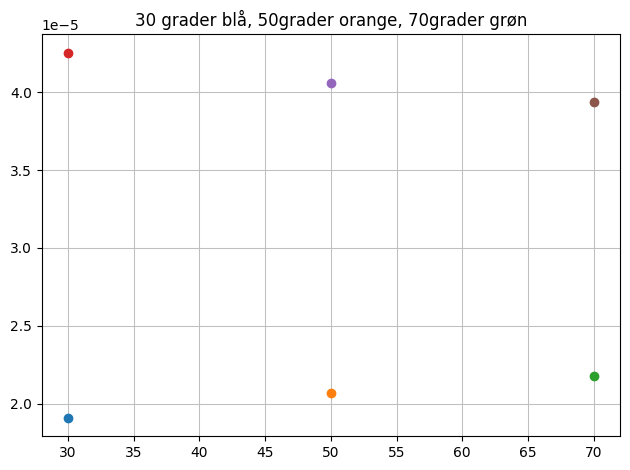

In [79]:
p1 = dtuplot.scatter(30,(sensitivitet(A30))[0],title="30 grader blå, 50grader orange, 70grader grøn",show = False)
p2 = dtuplot.scatter(50,(sensitivitet(A50))[0],show = False)
p3 = dtuplot.scatter(70,(sensitivitet(A70))[0],show = False)
p4 = dtuplot.scatter(30,(sensitivitet(A30))[1],title="30 grader blå, 50grader orange, 70grader grøn",show = False)
p5 = dtuplot.scatter(50,(sensitivitet(A50))[1],show = False)
p6 = dtuplot.scatter(70,(sensitivitet(A70))[1],show = False)

(p1+p2+p3+p4+p5+p6).show()

Des højere temperatur, des højere sensitivitet har egensvingningsformerne over for den ydre kraftpåvirkning